## Part 3: Doing Data Science

This part of the test is testing whether you can “be a data scientist”:

– understand a problem

– determine how best to solve it on your own

– and present results and conclusions to a non-technical audience.


There is no one to tell you what to do or how to do this job.
You will make the decisions, determine what to do and how you want to do it, and use your judgement, etc.


### The Problem
Suppose you work for Amazon and they ask you to (1) determine if a User should get a credit card (yes or no), and (2) determine
which products to advertise to the User.
Imagine that you have all of Amazon’s User data – anything you need.
- Design/create a small dataset that you can use to address the questions above. Paste it here. Keep it small with 3 – 4 columns and
25 – 30 rows. You decide the column/variable names and what the data would look like. It can be anything you want that also
makes sense with respect to the question. You create the dataset you need.
Next, describe, illustrate, and perform (in Python or R) whatever you think you need to do so that you can address the questions
asked properly.
- The reason why you are not being told what tools/methods/models to use is because on the job – you are the data scientist and
you determine what to use, what to do, what the results mean, and how to present it. Please do that here.
Discuss and illustrate your results and conclusions. YOU decide what is needed to do this.

Your audience/readers include only non-technical people

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Defining Dataset using pandas dataframe

data = {'User_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        'Income': [5000, 7500, 6000, 8000, 4500, 7000, 9000, 5500, 10000, 12000, 9500, 11000, 6000, 8500, 7500, 6500, 
               7000, 8000, 5500, 9000, 10000, 11000, 12000, 6500, 7500, 5700, 6500, 4730, 5370, 6400],
        'Credit_Score': [650, 700, 600, 750, 620, 720, 780, 640, 800, 820, 780, 810, 600, 750, 720, 670, 700, 760, 630, 780, 820, 800, 
                     810, 670, 720, 675, 715, 694, 765, 770],
        'Age': [28, 45, 60, 35, 40, 47, 42, 29, 25, 62, 55, 58, 37, 39, 29, 33, 54, 34, 44, 45, 53, 52, 55, 64, 65, 33, 43, 53, 63, 65],
        'Credit_Offer': [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]}

df = pd.DataFrame(data)

# Adding a list of recommended products for each user
df['Recommended_Products'] = [
    ['Laptop', 'Headphones', 'Fitness Tracker'],
    ['Smartphone', 'Headphones', 'Camera'],
    ['Smartphone', 'Laptop', 'Fitness Tracker'],
    ['Headphones', 'Camera'],
    ['Laptop', 'Fitness Tracker'],
    ['Smartphone', 'Headphones', 'Camera'],
    ['Smartphone', 'Laptop', 'Headphones'],
    ['Fitness Tracker'],
    ['Laptop', 'Smartphone', 'Headphones', 'Camera'],
    ['Laptop', 'Smartphone', 'Headphones', 'Fitness Tracker', 'Camera'],
    ['Smartphone', 'Laptop', 'Fitness Tracker', 'Camera'],
    ['Laptop', 'Smartphone', 'Headphones', 'Fitness Tracker', 'Camera'],
    ['Fitness Tracker'],
    ['Smartphone', 'Laptop', 'Headphones', 'Camera'],
    ['Smartphone', 'Fitness Tracker'],
    ['Laptop', 'Smartphone', 'Headphones', 'Fitness Tracker', 'Camera'],
    ['Fitness Tracker'],
    ['Smartphone', 'Headphones', 'Camera'],
    ['Laptop', 'Smartphone', 'Fitness Tracker', 'Camera'],
    ['Smartphone', 'Laptop', 'Headphones', 'Fitness Tracker', 'Camera'],
    ['Smartphone', 'Laptop', 'Headphones', 'Fitness Tracker', 'Camera'],
    ['Smartphone', 'Laptop', 'Fitness Tracker', 'Camera'],
    ['Fitness Tracker'],
    ['Laptop', 'Headphones', 'Camera'],
    ['Smartphone', 'Laptop', 'Fitness Tracker', 'Camera'],
    ['Fitness Tracker'],
    ['Laptop', 'Smartphone', 'Headphones', 'Camera'],
    ['Smartphone', 'Laptop', 'Headphones', 'Fitness Tracker', 'Camera'],
    ['Smartphone', 'Laptop', 'Headphones', 'Camera'],
    ['Laptop', 'Headphones', 'Camera']
]

# Printing dataframe
df.head(30)

,User_ID,Income,Credit_Score,Age,Credit_Offer,Recommended_Products
0,1,5000,650,28,1,"[Laptop, Headphones, Fitness Tracker]"
1,2,7500,700,45,0,"[Smartphone, Headphones, Camera]"
2,3,6000,600,60,1,"[Smartphone, Laptop, Fitness Tracker]"
3,4,8000,750,35,1,"[Headphones, Camera]"
4,5,4500,620,40,0,"[Laptop, Fitness Tracker]"
5,6,7000,720,47,1,"[Smartphone, Headphones, Camera]"
6,7,9000,780,42,1,"[Smartphone, Laptop, Headphones]"
7,8,5500,640,29,0,[Fitness Tracker]
8,9,10000,800,25,1,"[Laptop, Smartphone, Headphones, Camera]"
9,10,12000,820,62,1,"[Laptop, Smartphone, Headphones, Fitness Track..."


In [3]:
# Checking dimension of dataframe
df.shape

(30, 6)

In [4]:
# Checking structure of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   User_ID               30 non-null     int64 
 1   Income                30 non-null     int64 
 2   Credit_Score          30 non-null     int64 
 3   Age                   30 non-null     int64 
 4   Credit_Offer          30 non-null     int64 
 5   Recommended_Products  30 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


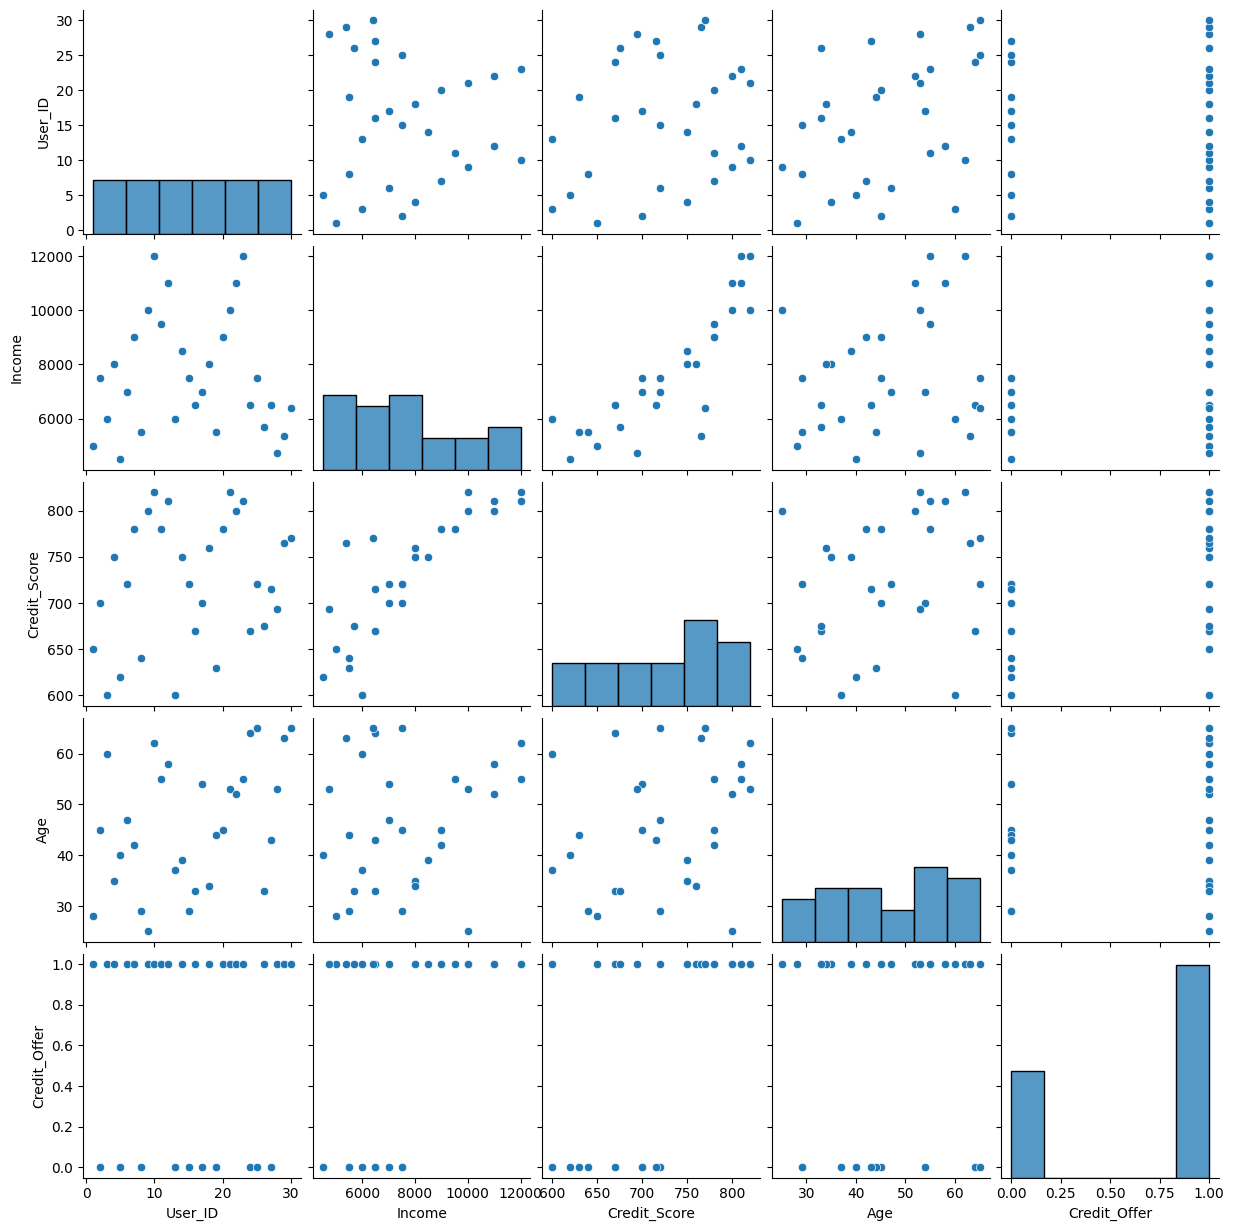

In [5]:
# Plotting the data
sns.pairplot(df)
plt.show()

# Problem 1: `Determine if a User should get a credit card (yes or no)`

## Data Preparation

In [6]:
# Defining dependent and independent columns
X = df[['Income', 'Credit_Score', 'Age']]
y = df['Credit_Offer']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Naive Bayes

In [7]:
# Initializing and training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions on the test set
nb_predictions = nb_model.predict(X_test)

# Evaluating the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Classification Report:")
print(classification_report(y_test, nb_predictions))


Naive Bayes Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.60      0.75         5

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



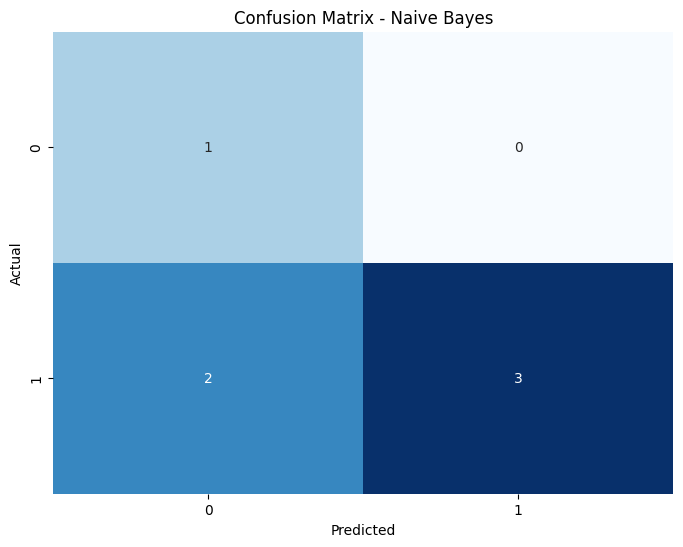

In [8]:
# Adding confusion matrix plot
cm = confusion_matrix(y_test, nb_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Inferences:

- Accuracy from Naive Bayes using Gaussian method is 66.67%
- The Naive Bayes classifier shows good accuracy and performs well in predicting class 0, but there is room for improvement in capturing instances of class 1

## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("\nDecision Tree Accuracy:", dt_accuracy)
print("Classification Report:")
print(classification_report(y_test, dt_predictions))



Decision Tree Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



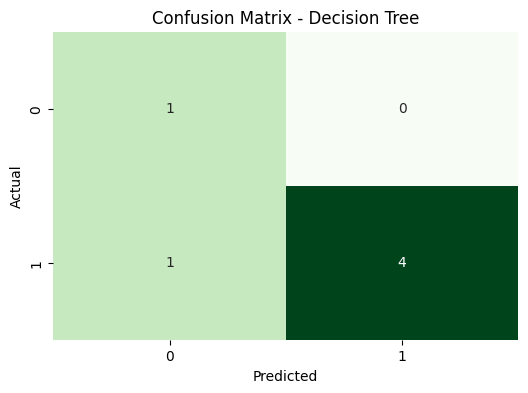

In [10]:
# Adding confusion matrix plot for Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Inferences:
- Accuracy from Decision Tree classifier is 83.34%
- The Decision Tree classifier shows better overall performance compared to Naive Bayes. It demonstrates good accuracy and effectively predicts both classes.

## Support Vector Machines

In [11]:
from sklearn.svm import SVC

# Initialize and train SVM with Linear Kernel
svm_linear_model = SVC(kernel='linear')
svm_linear_model.fit(X_train, y_train)

# Make predictions on the test set using Linear Kernel
svm_linear_predictions = svm_linear_model.predict(X_test)

# Evaluate the model with Linear Kernel
svm_linear_accuracy = accuracy_score(y_test, svm_linear_predictions)
print("\nSVM with Linear Kernel Accuracy:", svm_linear_accuracy)
print("Classification Report:")
print(classification_report(y_test, svm_linear_predictions, zero_division=1))



SVM with Linear Kernel Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.60      0.75         5

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



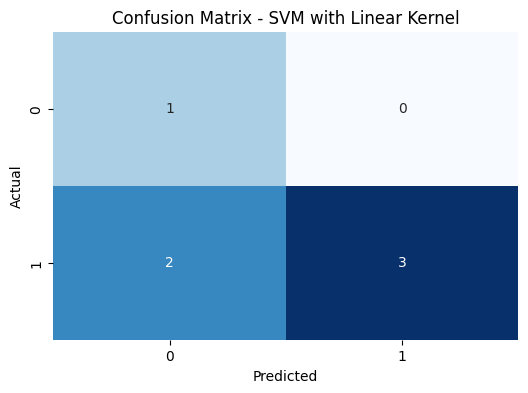

In [12]:
# Adding confusion matrix plot for SVM with Linear Kernel
cm_linear = confusion_matrix(y_test, svm_linear_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=svm_linear_model.classes_, yticklabels=svm_linear_model.classes_)
plt.title("Confusion Matrix - SVM with Linear Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
# Initialize and train SVM with Polynomial Kernel
svm_poly_model = SVC(kernel='poly', degree=2)  
svm_poly_model.fit(X_train, y_train)

# Make predictions on the test set using Polynomial Kernel
svm_poly_predictions = svm_poly_model.predict(X_test)

# Evaluate the model with Polynomial Kernel
svm_poly_accuracy = accuracy_score(y_test, svm_poly_predictions)
print("\nSVM with Polynomial Kernel Accuracy:", svm_poly_accuracy)
print("Classification Report:")
print(classification_report(y_test, svm_poly_predictions, zero_division=1))



SVM with Polynomial Kernel Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.60      0.75         5

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



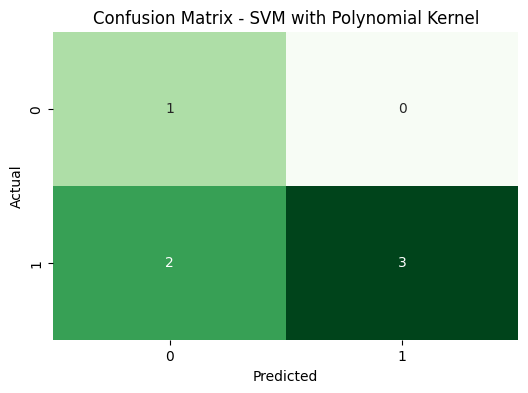

In [14]:
# Adding confusion matrix plot for SVM with Polynomial Kernel
cm_poly = confusion_matrix(y_test, svm_poly_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=svm_poly_model.classes_, yticklabels=svm_poly_model.classes_)
plt.title("Confusion Matrix - SVM with Polynomial Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
# Initialize and train SVM with Radial Kernel
svm_radial_model = SVC(kernel='rbf')
svm_radial_model.fit(X_train, y_train)

# Make predictions on the test set using Radial Kernel
svm_radial_predictions = svm_radial_model.predict(X_test)

# Evaluate the model with Radial Kernel
svm_radial_accuracy = accuracy_score(y_test, svm_radial_predictions)
print("\nSVM with Radial Kernel Accuracy:", svm_radial_accuracy)
print("Classification Report:")
print(classification_report(y_test, svm_radial_predictions, zero_division=1))


SVM with Radial Kernel Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.92      0.50      0.45         6
weighted avg       0.86      0.83      0.76         6



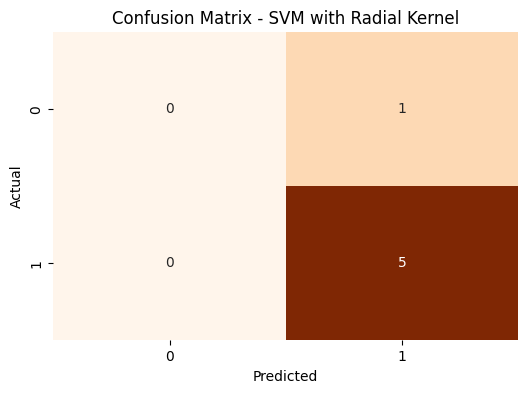

In [16]:
# Adding confusion matrix plot for SVM with Radial Kernel
cm_radial = confusion_matrix(y_test, svm_radial_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_radial, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=svm_radial_model.classes_, yticklabels=svm_radial_model.classes_)
plt.title("Confusion Matrix - SVM with Radial Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Inferences:

- Linear and Polynomial Kernels:
    - Both linear and polynomial kernels have similar performance metrics.
    - The models struggle to correctly predict class 0 (low precision and F1-score)
- Radial Kernel:
    - Radial kernel performs better overall with higher accuracy.
    - Perfect precision and recall for class 0, but it seems to have difficulty identifying instances of class 0 (0 recall).
    - High precision, recall, and F1-score for class 1, indicating good performance.

### Problem 1 conclusion:

- Implementation of Decision tree is efficient and gives maximum 83.34% 

- Highest overall accuracy: The Decision Tree model achieved the highest accuracy among the evaluated methods, accurately predicting the correct class labels for a significant proportion of instances in the dataset.

- Balanced performance for both classes: The model demonstrates balanced performance by achieving comparable precision, recall, and F1-score for both classes (0 and 1), indicating that it is effective in correctly identifying instances of both classes without a significant bias towards one class.

- Interpretability of the model: Decision Trees are inherently interpretable models, allowing for a clear understanding of the decision-making process. The transparency of the model's structure makes it easier for stakeholders and domain experts to comprehend how specific features contribute to the classification outcome, enhancing the interpretability and trustworthiness of the model in practical applications.

# Problem 2: `Determine which products to advertise to the User`

In [17]:
# Converting the list of recommended products into a list of lists
transactions = df['Recommended_Products'].tolist()

# Using TransactionEncoder to transform the data into a suitable format for Apriori
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

# Creating a DataFrame with the transformed data
df_apriori = pd.DataFrame(te_array, columns=te.columns_)

# Checking dataframe
df_apriori.head()

,Camera,Fitness Tracker,Headphones,Laptop,Smartphone
0,False,True,True,True,False
1,True,False,True,False,True
2,False,True,False,True,True
3,True,False,True,False,False
4,False,True,False,True,False


In [18]:
# Applying Apriori algorithm to find frequent itemsets 
frequent_itemsets = apriori(df_apriori, min_support=0.2, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [19]:
# Displaying the association rules
print("Association Rules:")
print(rules['antecedents'])

Association Rules:
0                                          (Headphones)
1                                              (Camera)
2                                              (Laptop)
3                                              (Camera)
4                                          (Smartphone)
5                                              (Camera)
6                                              (Laptop)
7                                          (Headphones)
8                                          (Smartphone)
9                                          (Headphones)
10                                         (Smartphone)
11                                             (Laptop)
12                        (Fitness Tracker, Headphones)
13                            (Fitness Tracker, Camera)
14                            (Fitness Tracker, Laptop)
15                        (Smartphone, Fitness Tracker)
16                            (Fitness Tracker, Camera)
17                           

In [20]:
print("Association Rules:")
print(rules[['consequents', 'support', 'confidence']])

Association Rules:
                     consequents   support  confidence
0                       (Camera)  0.533333    0.888889
1                   (Headphones)  0.533333    0.800000
2                       (Camera)  0.533333    0.800000
3                       (Laptop)  0.533333    0.800000
4                       (Camera)  0.566667    0.850000
5                   (Smartphone)  0.566667    0.850000
6                   (Headphones)  0.466667    0.700000
7                       (Laptop)  0.466667    0.777778
8                   (Headphones)  0.466667    0.700000
9                   (Smartphone)  0.466667    0.777778
10                      (Laptop)  0.533333    0.800000
11                  (Smartphone)  0.533333    0.800000
12                      (Camera)  0.200000    0.857143
13                      (Laptop)  0.333333    1.000000
14                      (Camera)  0.333333    0.769231
15                      (Camera)  0.333333    0.833333
16                  (Smartphone)  0.333333    

## Inferences:

1. Antecedents and Consequents: Each row represents an association rule, where "antecedents" are the products that are frequently recommended together, and "consequents" are the products that tend to be recommended as a result.

2. Support: Support indicates the proportion of transactions that contain the given itemset.

3. Confidence: Confidence measures how often the rule has been found to be true. 

## **Problem 2 Conclusion:**

- Frequently Recommended Pairs:
   - "Camera" and "Headphones" are frequently recommended together (support: 53.33%, confidence: 88.89%)
   - "Laptop" and "Smartphone" are frequently recommended together (support: 46.67%, confidence: 70.00%)

- High Confidence Rules:
   - Rules such as "Headphones, Fitness Tracker → Camera" and "Fitness Tracker, Laptop → Smartphone" have high confidence values, indicating strong associations between these product combinations

- Complete Sets:
   - There are rules indicating that a complete set of products is recommended together, such as "Camera, Smartphone, Laptop" (support: 20.00%, confidence: 85.71%)

Based on these association rules, if a user has been recommended "Headphones," we want to consider advertising "Camera" as well due to the high confidence in their association.